# CSE 40647 Data Science Final Project

Project: Investigating the Influence of Social and Economic Factors on College Students' Graduation and Dropout Rates

Students:
- Noor Maria Achkar (nachkar@nd.edu)
- Tram Trinh (htrinh@nd.edu)

### Starter Code

In [110]:
# Allow inline plotting of figures.
%matplotlib inline

# Import useful libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [77]:
# For plot formatting.
plt.style.use = 'default'
plt.rcParams["patch.force_edgecolor"] = True  # helpful for matplotlib version greater than 2

# Read the file into a DataFrame.
raw_data = pd.read_csv('./dataset.csv')

# Output the first few rows of the dataset.
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding and Preprocessing

In [78]:
raw_data.shape

(4424, 35)

In [79]:
raw_data.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1          

In [81]:
# Check for NULL
print(raw_data.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [82]:
# Check for duplicates
print(raw_data.duplicated().sum())

0


In [83]:
raw_data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [101]:
# Filter the DataFrame to keep only 'Dropout' and 'Graduate' rows
data = raw_data[raw_data['Target'].isin(['Dropout', 'Graduate'])]
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [102]:
# Drop columns

data = data.drop(columns=['Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Application mode', 'Application order', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)' ], axis=1)


In [103]:
data.head()

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate


#### Summary Statistics

In [104]:
# Select continuous features
continuous_features = data[[
    'Age at enrollment',
    'Course',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]]

# Get statistics for each continuous feature
statistics = continuous_features.describe()
print(statistics.loc[['min', 'max', 'mean', 'std']])

      Age at enrollment     Course  Unemployment rate  Inflation rate  \
min           17.000000   1.000000           7.600000       -0.800000   
max           70.000000  17.000000          16.200000        3.700000   
mean          23.461157   9.935537          11.630358        1.231598   
std            7.827994   4.340715           2.667652        1.384911   

           GDP  
min  -4.060000  
max   3.510000  
mean -0.009256  
std   2.259986  


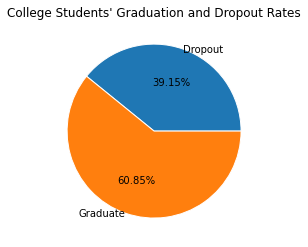

In [114]:
# Count the occurrences of each unique class 
count = []
for target_value in data['Target'].unique():
    count.append(data['Target'].tolist().count(target_value))

# Create the pie chart
plt.pie(count, labels=data['Target'].unique(), autopct="%.2f%%", labeldistance=1., 
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, textprops={'color': 'black', 'fontsize': 10})
plt.title('College Students\' Graduation and Dropout Rates')

plt.show()

### Preprocessing Data

In [115]:
y = data['Target']
# Convert y column to 1/0
y = (y == 'Graduate').astype(int)

In [116]:
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64

In [117]:
X = data.drop('Target', axis=1)

In [118]:
X

,Marital status,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
0,1,2,13,10,6,10,1,0,0,1,1,0,20,0,10.8,1.4,1.74
1,1,11,1,3,4,4,1,0,0,0,1,0,19,0,13.9,-0.3,0.79
2,1,5,22,27,10,10,1,0,0,0,1,0,19,0,10.8,1.4,1.74
3,1,15,23,27,6,4,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12
4,2,3,22,28,10,10,0,0,0,1,0,0,45,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,15,1,1,6,5,0,0,0,1,1,0,19,0,15.5,2.8,-4.06
4420,1,15,1,1,10,10,1,0,1,0,0,0,18,1,11.1,0.6,2.02
4421,1,12,22,27,10,10,1,0,0,1,0,1,30,0,13.9,-0.3,0.79
4422,1,9,22,27,8,5,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12


## Train and Test Sets

In [ ]:
# Encode data if needed before split for train and test sets

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)